# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df_cancer = data.frame
df_cancer.head(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [3]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

# Analisis del Dataset

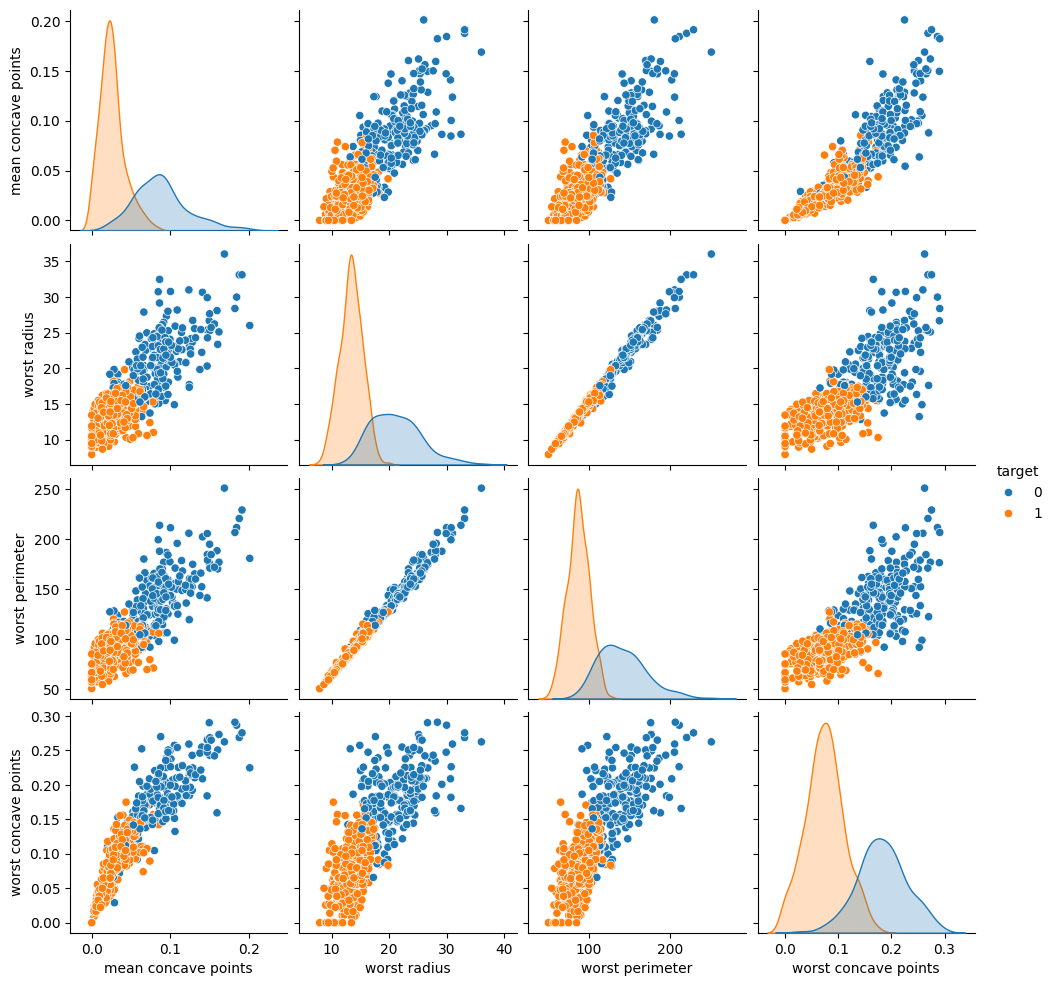

In [4]:
correlation = df_cancer.corr()
threshold = 0.75
filter = np.abs(correlation["target"]) > threshold
correlation_features = correlation.columns[filter].tolist()
sns.pairplot(df_cancer[correlation_features], diag_kind = "kde",  hue="target")
plt.show()

# Preprocesamiento de datos

In [5]:
# Hacemos el Split 70-30 para train-test
X = df_cancer.drop(columns="target")
y = df_cancer["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [6]:
#Pipeline LogisticRegression basico
pl_logreg = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", ['mean concave points', 'worst radius', 'worst perimeter', 'worst concave points'])], remainder="drop")),
    ('classifier', LogisticRegression())
])
pl_logreg.fit(X_train, y_train)

Pipeline(steps=[('selector',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['mean concave points',
                                                   'worst radius',
                                                   'worst perimeter',
                                                   'worst concave points'])])),
                ('classifier', LogisticRegression())])

In [7]:
y_pred_lg = pl_logreg.predict(X_test)

# Comparamos por Curva ROC

In [8]:
def graficarCurvaRoc( y_pred, model ):
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred)
  # Graficamos
  plt.plot(fpr,tpr,label= model +" AUC="+str(round(auc,4))) #,label= "AUC="+str(auc))
  plt.legend(loc=4, fontsize=12)
  return auc

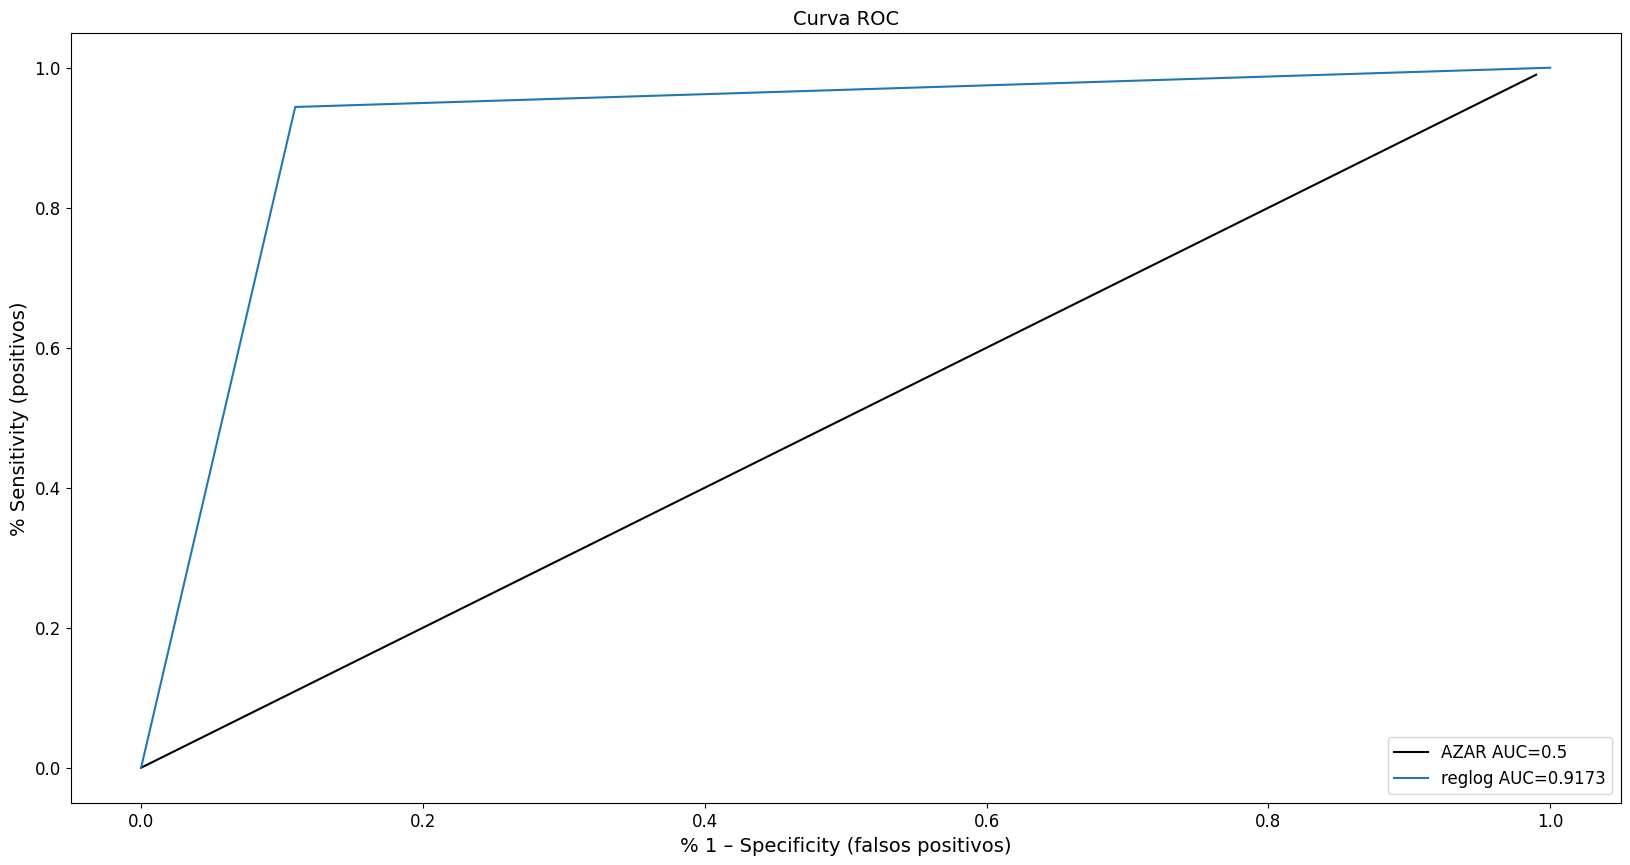

In [9]:
# Inicializamos los labels del gr√°fico
plt.figure(figsize=(20, 10))
plt.xlabel('% 1 ‚Äì Specificity (falsos positivos)', fontsize=14)
plt.ylabel('% Sensitivity (positivos)', fontsize=14)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR AUC=0.5",color="black")

modelos = {'reglog':y_pred_lg}
areas = []
for pred in modelos:
    auc = graficarCurvaRoc( modelos[pred] , pred )
    areas.append( (pred, auc) )
areas = pd.DataFrame(areas, columns=['model','auc'])
# Agregamos el titulo y configuro el tama√±o de letra
plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

In [10]:
areas.sort_values('auc', ascending=False)

model       auc
0  reglog  0.917275

# Ejercicio

### Analisis
- Averiguar distribuci√≥n de la variable target.
- Graficar Heatmap de la correlacion entre variables numericas y el target.

### Evaluacion de Modelos
- Crear Pipelines para otros modelos (arbol, bayes y knn )
- Comparar los resultados por sus curvas ROC
- ¬øMejoran los modelos con m√°s columnas? (modificando el step de selector del pipeline)
- ¬øMejoran los modelos escalando las variables? (agregando un step de escalado a los pipelines)

### Fine-tunning
- Elegir uno de los modelos y optimizarlo con gridsearchCV

## Analisis

Averiguar distribuci√≥n de la variable target.

In [17]:
df_cancer['target'].value_counts(normalize=True) * 100

target
1    62.741652
0    37.258348
Name: proportion, dtype: float64

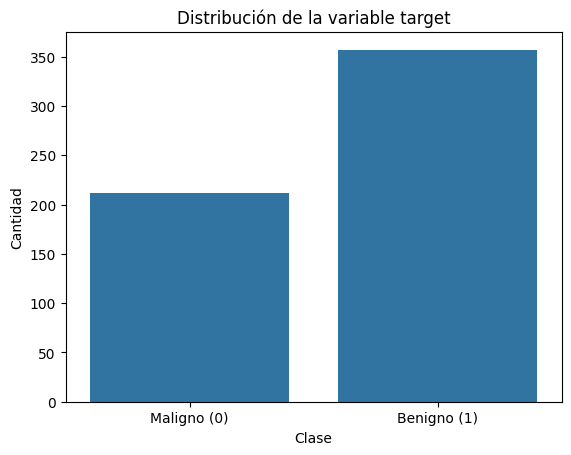

In [18]:
sns.countplot(x='target', data=df_cancer)
plt.title('Distribuci√≥n de la variable target')
plt.xticks([0, 1], ['Maligno (0)', 'Benigno (1)'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

Graficar Heatmap de la correlacion entre variables numericas y el target

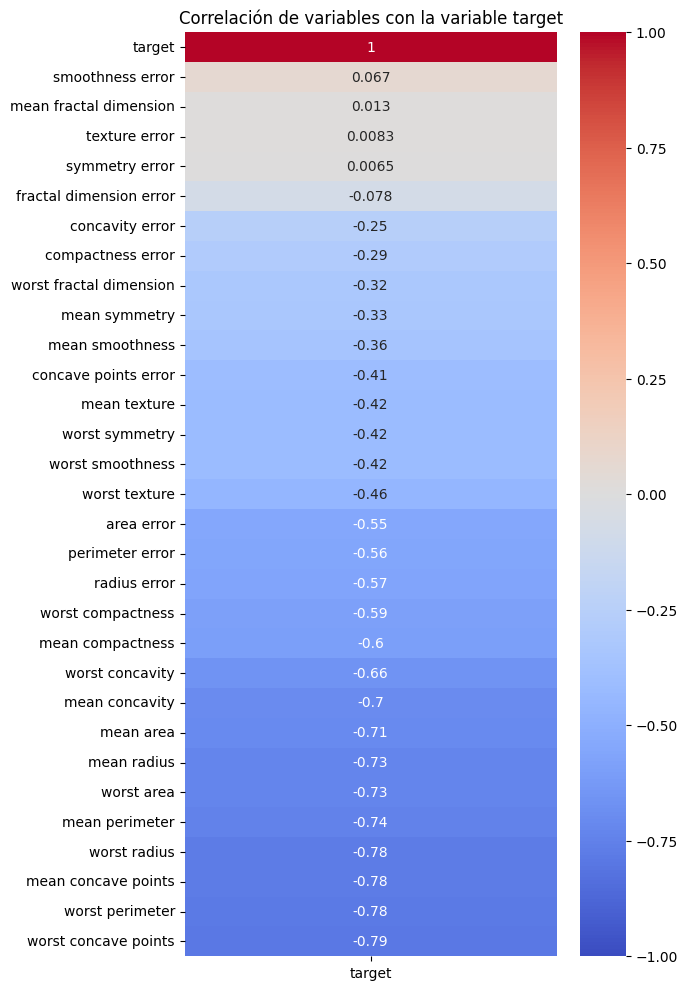

In [19]:
# Calcular la matriz de correlaci√≥n
correlation_matrix = df_cancer.corr(numeric_only=True)

# Seleccionar solo las correlaciones con 'target'
cor_target = correlation_matrix[['target']].sort_values(by='target', ascending=False)

# Graficar el heatmap
plt.figure(figsize=(6, 12))
sns.heatmap(cor_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlaci√≥n de variables con la variable target')
plt.show()

## Evaluacion de Modelos

Crear Pipelines para otros modelos (arbol, bayes y knn )

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Pipeline √Årbol de Decisi√≥n
pl_tree = Pipeline([
    ("selector", ColumnTransformer([
        ("selector", "passthrough", ['mean concave points', 'worst radius', 'worst perimeter', 'worst concave points'])
    ], remainder="drop")),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

# Entrenar
pl_tree.fit(X_train, y_train)
y_pred_tree = pl_tree.predict(X_test)

In [21]:
from sklearn.naive_bayes import GaussianNB

# Pipeline Naive Bayes
pl_nb = Pipeline([
    ("selector", ColumnTransformer([
        ("selector", "passthrough", ['mean concave points', 'worst radius', 'worst perimeter', 'worst concave points'])
    ], remainder="drop")),
    ("classifier", GaussianNB())
])

# Entrenar
pl_nb.fit(X_train, y_train)
y_pred_nb = pl_nb.predict(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Pipeline KNN
pl_knn = Pipeline([
    ("selector", ColumnTransformer([
        ("selector", "passthrough", ['mean concave points', 'worst radius', 'worst perimeter', 'worst concave points'])
    ], remainder="drop")),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

# Entrenar
pl_knn.fit(X_train, y_train)
y_pred_knn = pl_knn.predict(X_test)

Comparar los resultados por sus curvas ROC

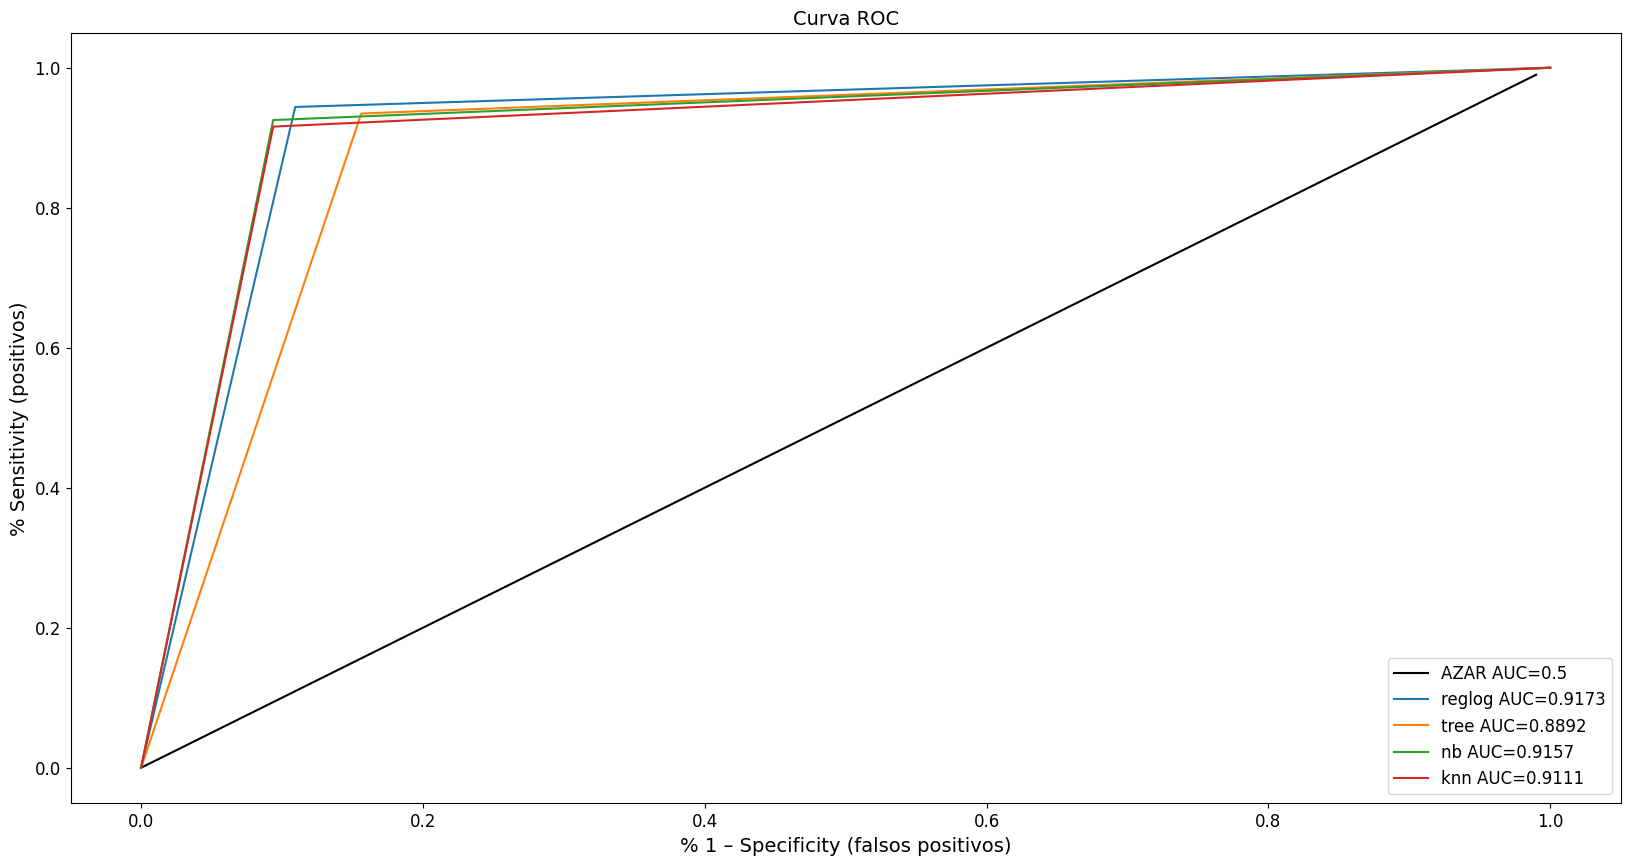

In [26]:
# Inicializamos los labels del gr√°fico
plt.figure(figsize=(20, 10))
plt.xlabel('% 1 ‚Äì Specificity (falsos positivos)', fontsize=14)
plt.ylabel('% Sensitivity (positivos)', fontsize=14)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR AUC=0.5",color="black")

modelos = {'reglog':y_pred_lg, 'tree': y_pred_tree, 'nb': y_pred_nb, 'knn': y_pred_knn}
areas = []
for pred in modelos:
    auc = graficarCurvaRoc( modelos[pred] , pred )
    areas.append( (pred, auc) )
areas = pd.DataFrame(areas, columns=['model','auc'])
# Agregamos el titulo y configuro el tama√±o de letra
plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

¬øMejoran los modelos con m√°s columnas? (modificando el step de selector del pipeline)

In [52]:
# Matriz de correlaci√≥n
corr_matrix = df_cancer.corr()
# Parte superior para no repetir pares ni diagonal
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Defino umbral para correlaci√≥n alta (en valor absoluto)
threshold = 0.95
# Busco pares con correlaci√≥n absoluta >= threshold
high_corr = [(col, row, corr_val) for col in upper.columns for row, corr_val in upper[col].items() if abs(corr_val) >= threshold]

print("Pares de variables con correlaci√≥n alta (>= 0.95):")
for c1, c2, val in high_corr:
    print(f"{c1} y {c2} --> correlaci√≥n: {val:.4f}")

# Variables a eliminar (segunda de cada par)
vars_to_drop = [pair[1] for pair in high_corr]

print("\nVariables a eliminar por alta correlaci√≥n:")
print(vars_to_drop)

# Nuevo dataset sin variables redundantes
df_cancer_reduced = df_cancer.drop(columns=vars_to_drop)

print("\nColumnas despu√©s de eliminar variables redundantes:")
print(df_cancer_reduced.columns)

Pares de variables con correlaci√≥n alta (>= 0.95):
mean perimeter y mean radius --> correlaci√≥n: 0.9979
mean area y mean radius --> correlaci√≥n: 0.9874
mean area y mean perimeter --> correlaci√≥n: 0.9865
perimeter error y radius error --> correlaci√≥n: 0.9728
area error y radius error --> correlaci√≥n: 0.9518
worst radius y mean radius --> correlaci√≥n: 0.9695
worst radius y mean perimeter --> correlaci√≥n: 0.9695
worst radius y mean area --> correlaci√≥n: 0.9627
worst perimeter y mean radius --> correlaci√≥n: 0.9651
worst perimeter y mean perimeter --> correlaci√≥n: 0.9704
worst perimeter y mean area --> correlaci√≥n: 0.9591
worst perimeter y worst radius --> correlaci√≥n: 0.9937
worst area y mean area --> correlaci√≥n: 0.9592
worst area y worst radius --> correlaci√≥n: 0.9840
worst area y worst perimeter --> correlaci√≥n: 0.9776

Variables a eliminar por alta correlaci√≥n:
['mean radius', 'mean radius', 'mean perimeter', 'radius error', 'radius error', 'mean radius', 'mean perimet

Sacar redundantes no hizo que funcione mejor üò≤

In [74]:
corr = df_cancer.corr()
corr_target = corr['target'].abs().sort_values(ascending=False)

# Tomo las top 4 variables (excluyendo la primera que es 'target' mismo)
cols_seleccionadas = corr_target.index[1:6].tolist()

print("Columnas seleccionadas para el pipeline:")
print(cols_seleccionadas)

# Defino el selector para el pipeline
selector = ColumnTransformer([
    ("selector", "passthrough", cols_seleccionadas)
], remainder="drop")

Columnas seleccionadas para el pipeline:
['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter']


In [75]:
# Pipeline regresi√≥n log√≠stica
pl_logreg = Pipeline([
    ("selector", selector),
    ("classifier", LogisticRegression())
])
pl_logreg.fit(X_train, y_train)
y_pred_lg = pl_logreg.predict(X_test)
# ----------------------------------------------
# Pipeline KNN
pl_knn = Pipeline([
    ("selector", selector),
    ("classifier", KNeighborsClassifier())
])
# Entrenar
pl_knn.fit(X_train, y_train)
y_pred_knn = pl_knn.predict(X_test)
# ----------------------------------------------
# Pipeline Naive Bayes
pl_nb = Pipeline([
    ("selector", selector),
    ("classifier", GaussianNB())
])
# Entrenar
pl_nb.fit(X_train, y_train)
y_pred_nb = pl_nb.predict(X_test)
# ----------------------------------------------
# Pipeline √°rbol de decisi√≥n
pl_tree = Pipeline([
    ("selector", selector),
    ("classifier", DecisionTreeClassifier())
])
# Entrenar
pl_tree.fit(X_train, y_train)
y_pred_tree = pl_tree.predict(X_test)

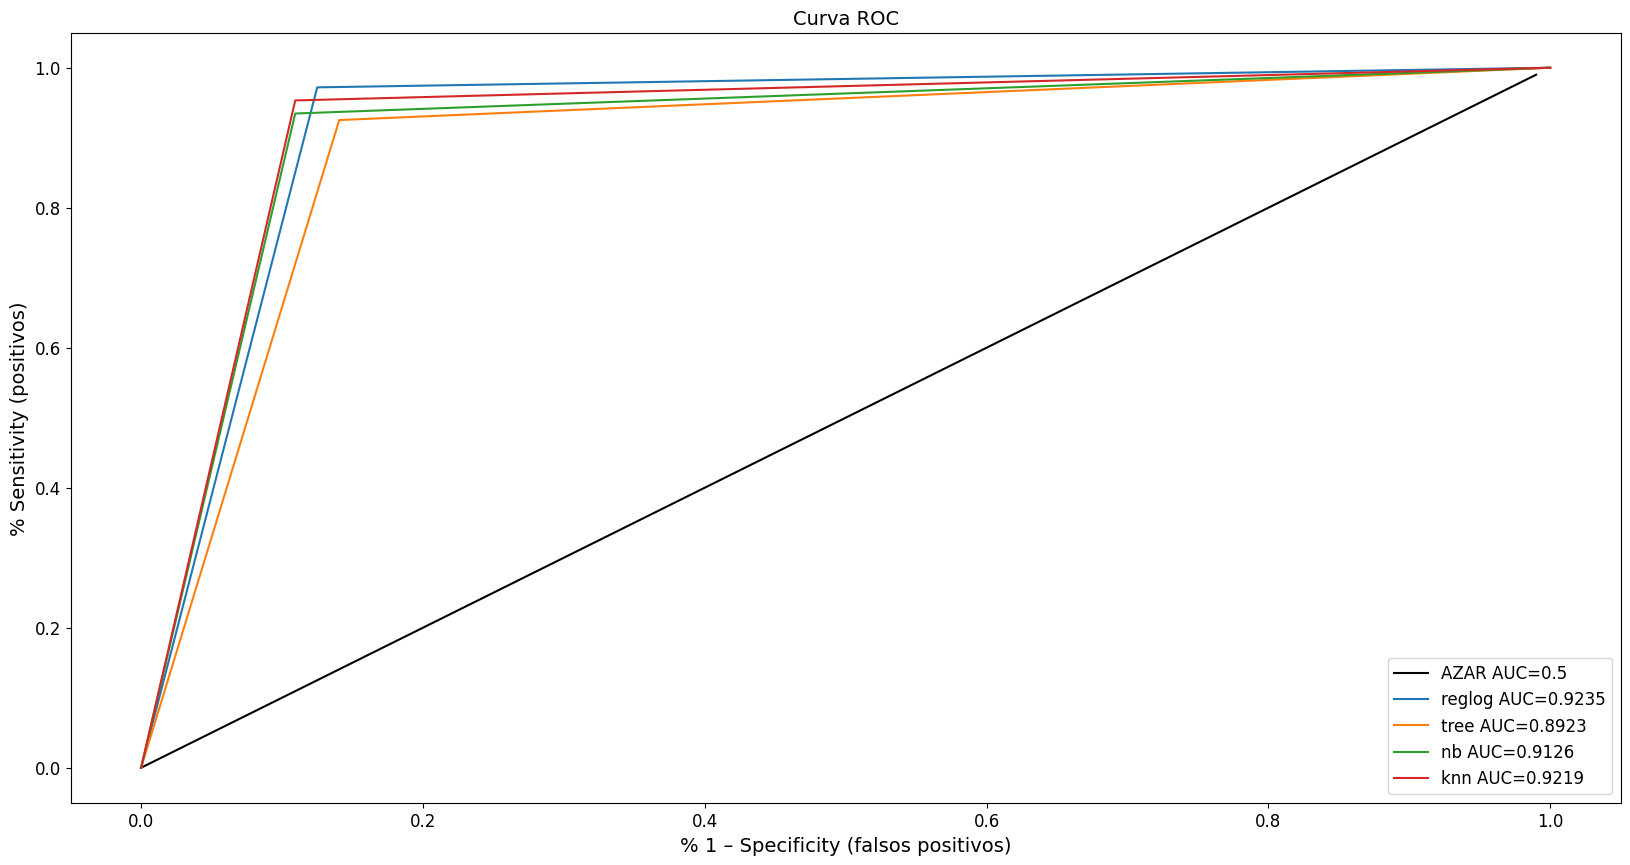

In [76]:
# Inicializamos los labels del gr√°fico
plt.figure(figsize=(20, 10))
plt.xlabel('% 1 ‚Äì Specificity (falsos positivos)', fontsize=14)
plt.ylabel('% Sensitivity (positivos)', fontsize=14)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR AUC=0.5",color="black")

modelos = {'reglog':y_pred_lg, 'tree': y_pred_tree, 'nb': y_pred_nb, 'knn': y_pred_knn}
areas = []
for pred in modelos:
    auc = graficarCurvaRoc( modelos[pred] , pred )
    areas.append( (pred, auc) )
areas = pd.DataFrame(areas, columns=['model','auc'])
# Agregamos el titulo y configuro el tama√±o de letra
plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

Agregando una variable m√°s, mejoraron los numeros generales.

¬øMejoran los modelos escalando las variables? (agregando un step de escalado a los pipelines)

In [94]:
# Defino escalador
scaler = StandardScaler()

In [95]:
corr = df_cancer.corr()
corr_target = corr['target'].abs().sort_values(ascending=False)

# Tomo las top 4 variables (excluyendo la primera que es 'target' mismo)
cols_seleccionadas = corr_target.index[1:6].tolist()

print("Columnas seleccionadas para el pipeline:")
print(cols_seleccionadas)

# Defino el selector para el pipeline
selector = ColumnTransformer([
    ("selector", "passthrough", cols_seleccionadas)
], remainder="drop")

Columnas seleccionadas para el pipeline:
['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter']


In [96]:
# Pipeline regresi√≥n log√≠stica
pl_logreg = Pipeline([
    ("selector", selector),
    ('scaler', scaler),
    ("classifier", LogisticRegression())
])
pl_logreg.fit(X_train, y_train)
y_pred_lg = pl_logreg.predict(X_test)
# ----------------------------------------------
# Pipeline KNN
pl_knn = Pipeline([
    ("selector", selector),
    ('scaler', scaler),
    ("classifier", KNeighborsClassifier())
])
# Entrenar
pl_knn.fit(X_train, y_train)
y_pred_knn = pl_knn.predict(X_test)
# ----------------------------------------------
# Pipeline Naive Bayes
pl_nb = Pipeline([
    ("selector", selector),
    ('scaler', scaler),
    ("classifier", GaussianNB())
])
# Entrenar
pl_nb.fit(X_train, y_train)
y_pred_nb = pl_nb.predict(X_test)
# ----------------------------------------------
# Pipeline √°rbol de decisi√≥n
pl_tree = Pipeline([
    ("selector", selector),
    ('scaler', scaler),
    ("classifier", DecisionTreeClassifier())
])
# Entrenar
pl_tree.fit(X_train, y_train)
y_pred_tree = pl_tree.predict(X_test)

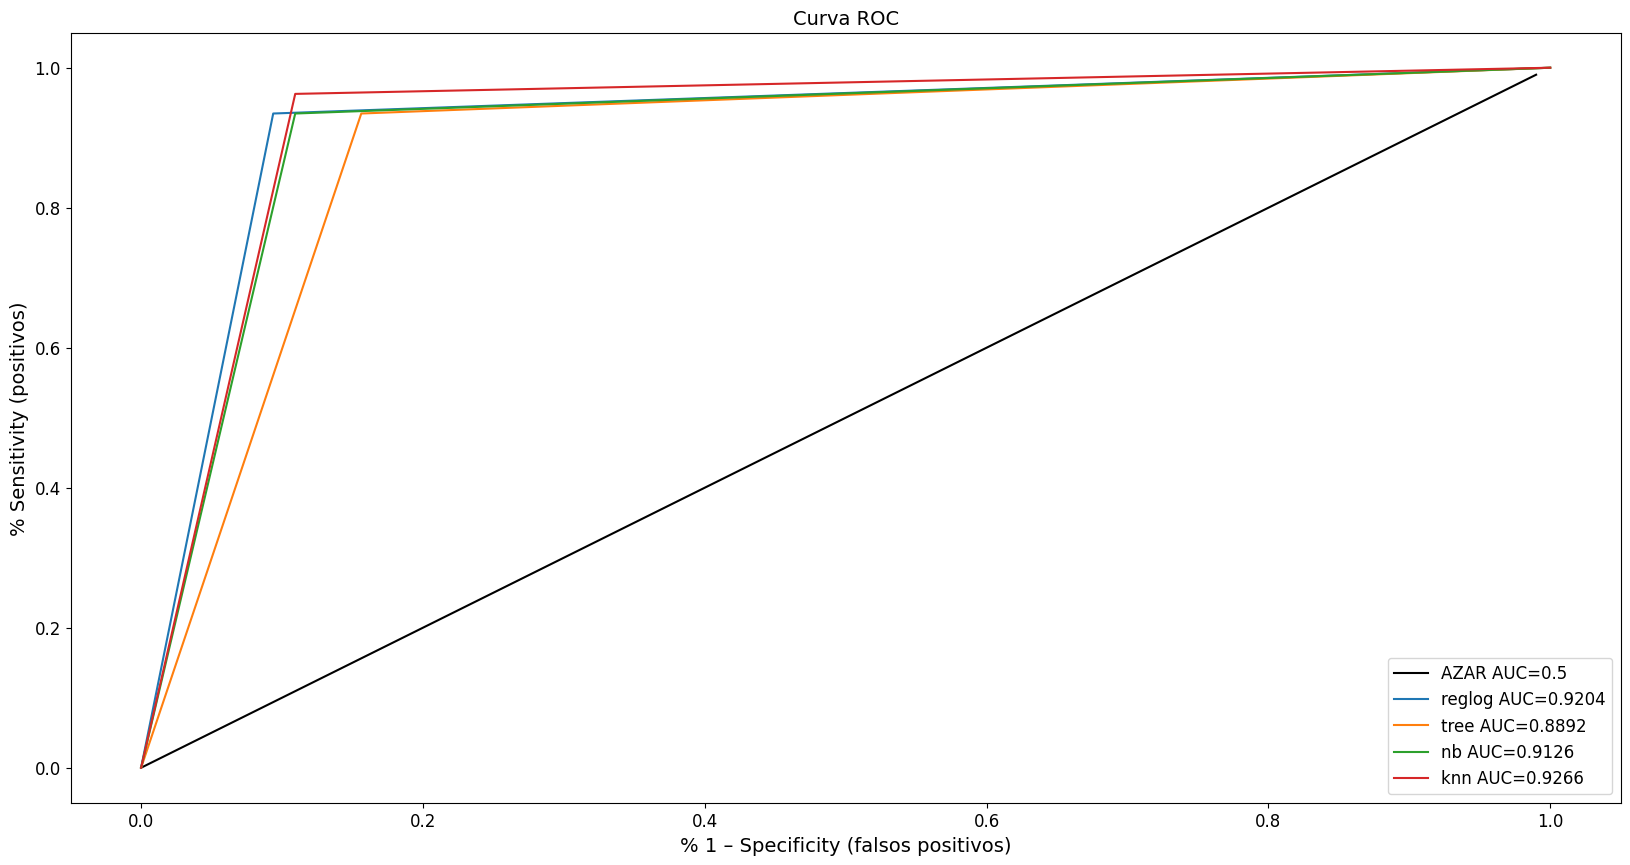

In [97]:
# Inicializamos los labels del gr√°fico
plt.figure(figsize=(20, 10))
plt.xlabel('% 1 ‚Äì Specificity (falsos positivos)', fontsize=14)
plt.ylabel('% Sensitivity (positivos)', fontsize=14)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR AUC=0.5",color="black")

modelos = {'reglog':y_pred_lg, 'tree': y_pred_tree, 'nb': y_pred_nb, 'knn': y_pred_knn}
areas = []
for pred in modelos:
    auc = graficarCurvaRoc( modelos[pred] , pred )
    areas.append( (pred, auc) )
areas = pd.DataFrame(areas, columns=['model','auc'])
# Agregamos el titulo y configuro el tama√±o de letra
plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

Escalando las variables, los resultados empeoran.

Pero si escalo las variables y uso el dataset (que hice antes) sin las que tienen correlaci√≥n mayor a 0.95 funciona mejor que todas las veces üòä

In [112]:
corr = df_cancer_reduced.corr()
corr_target = corr['target'].abs().sort_values(ascending=False)

# Tomo las top 4 variables (excluyendo la primera que es 'target' mismo)
cols_seleccionadas = corr_target.index[1:6].tolist()

print("Columnas seleccionadas para el pipeline:")
print(cols_seleccionadas)

# Defino el selector para el pipeline
selector = ColumnTransformer([
    ("selector", "passthrough", cols_seleccionadas)
], remainder="drop")

Columnas seleccionadas para el pipeline:
['worst concave points', 'mean concave points', 'worst area', 'mean concavity', 'worst concavity']


In [114]:
# Pipeline regresi√≥n log√≠stica
pl_logreg = Pipeline([
    ("selector", selector),
    ('scaler', scaler),
    ("classifier", LogisticRegression())
])
pl_logreg.fit(X_train, y_train)
y_pred_lg = pl_logreg.predict(X_test)
# ----------------------------------------------
# Pipeline KNN
pl_knn = Pipeline([
    ("selector", selector),
    ('scaler', scaler),
    ("classifier", KNeighborsClassifier())
])
# Entrenar
pl_knn.fit(X_train, y_train)
y_pred_knn = pl_knn.predict(X_test)
# ----------------------------------------------
# Pipeline Naive Bayes
pl_nb = Pipeline([
    ("selector", selector),
    ('scaler', scaler),
    ("classifier", GaussianNB())
])
# Entrenar
pl_nb.fit(X_train, y_train)
y_pred_nb = pl_nb.predict(X_test)
# ----------------------------------------------
# Pipeline √°rbol de decisi√≥n
pl_tree = Pipeline([
    ("selector", selector),
    ('scaler', scaler),
    ("classifier", DecisionTreeClassifier())
])
# Entrenar
pl_tree.fit(X_train, y_train)
y_pred_tree = pl_tree.predict(X_test)

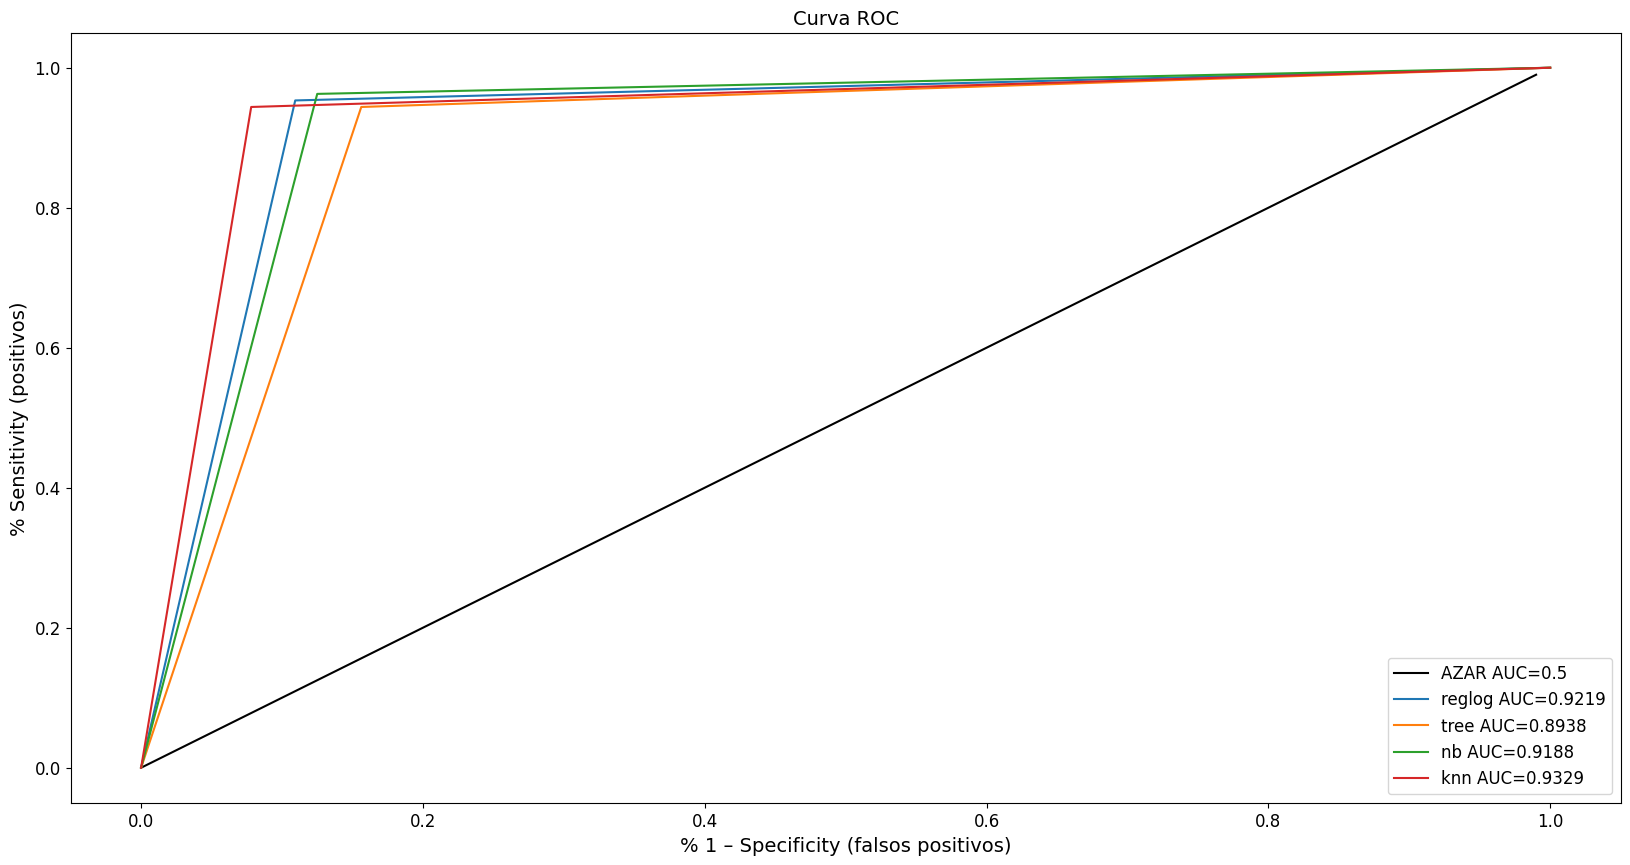

In [115]:
# Inicializamos los labels del gr√°fico
plt.figure(figsize=(20, 10))
plt.xlabel('% 1 ‚Äì Specificity (falsos positivos)', fontsize=14)
plt.ylabel('% Sensitivity (positivos)', fontsize=14)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR AUC=0.5",color="black")

modelos = {'reglog':y_pred_lg, 'tree': y_pred_tree, 'nb': y_pred_nb, 'knn': y_pred_knn}
areas = []
for pred in modelos:
    auc = graficarCurvaRoc( modelos[pred] , pred )
    areas.append( (pred, auc) )
areas = pd.DataFrame(areas, columns=['model','auc'])
# Agregamos el titulo y configuro el tama√±o de letra
plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

## Fine-tunning

Elegir uno de los modelos y optimizarlo con gridsearchCV

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],      # cantidad de vecinos
    'classifier__weights': ['uniform', 'distance'],   # peso de los vecinos
    'classifier__metric': ['euclidean', 'manhattan']  # m√©tricas de distancia
}

grid_search_knn = GridSearchCV(pl_knn, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search_knn.fit(X_train, y_train)

print("Mejores par√°metros KNN:", grid_search_knn.best_params_)
print("Mejor AUC CV KNN:", grid_search_knn.best_score_)

# Evaluaci√≥n en test
y_pred_knn_best = grid_search_knn.predict(X_test)
from sklearn.metrics import roc_auc_score
print("AUC test KNN:", roc_auc_score(y_test, y_pred_knn_best))

Mejores par√°metros KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
Mejor AUC CV KNN: 0.9843402298850574
AUC test KNN: 0.9266209112149533


In [122]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # regularizaci√≥n
    'classifier__penalty': ['l2'],  # s√≥lo l2 porque l1 requiere solver distinto
    'classifier__solver': ['lbfgs', 'saga']
}

grid_search = GridSearchCV(pl_logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Entreno con los datos de entrenamiento
grid_search.fit(X_train, y_train)

print("Mejores par√°metros:", grid_search.best_params_)
print("Mejor AUC en CV:", grid_search.best_score_)

# Evaluaci√≥n final en test
y_pred_best = grid_search.predict(X_test)
from sklearn.metrics import roc_auc_score
print("AUC en test:", roc_auc_score(y_test, y_pred_best))


Mejores par√°metros: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Mejor AUC en CV: 0.9915724137931035
AUC en test: 0.9219480140186915


In [123]:
param_grid_nb = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

grid_search_nb = GridSearchCV(pl_nb, param_grid_nb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

print("Mejores par√°metros NB:", grid_search_nb.best_params_)
print("Mejor AUC CV NB:", grid_search_nb.best_score_)

y_pred_nb_best = grid_search_nb.predict(X_test)
print("AUC test NB:", roc_auc_score(y_test, y_pred_nb_best))

Mejores par√°metros NB: {'classifier__var_smoothing': 1e-09}
Mejor AUC CV NB: 0.978735632183908
AUC test NB: 0.9188084112149533


In [124]:
param_grid_tree = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search_tree = GridSearchCV(pl_tree, param_grid_tree, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

print("Mejores par√°metros √Årbol:", grid_search_tree.best_params_)
print("Mejor AUC CV √Årbol:", grid_search_tree.best_score_)

y_pred_tree_best = grid_search_tree.predict(X_test)
print("AUC test √Årbol:", roc_auc_score(y_test, y_pred_tree_best))

Mejores par√°metros √Årbol: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 10}
Mejor AUC CV √Årbol: 0.9757517241379311
AUC test √Årbol: 0.9047897196261683


KNN termina siendo el mejor para clasificar en este caso.